In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

In [2]:
x = np.arange(10,20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

### Pearson R correclation values

In [3]:
corr_matrix = np.corrcoef(x,y)

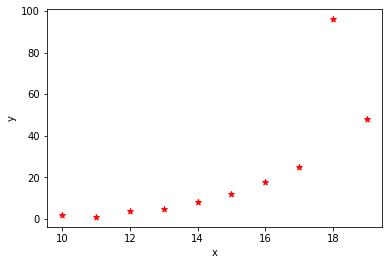

In [4]:
plt.scatter(x,y,color= "red",marker= "*")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Pearson's R correclation values and other correclation computations but in SciPy

#### Allows index notation (return 2 values: corr coef and p-value for test of non-correlation

In [5]:
scipy.stats.pearsonr(x,y)

(0.758640289091187, 0.010964341301680813)

#### Does not allow index notation (returns class-object)

In [6]:
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [7]:
scipy.stats.kendalltau(x,y)

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [8]:
new_x = pd.Series(range(10,20))
new_y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [9]:
new_x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [10]:
new_y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

### One more way to compute correlation (with pandas)

In [11]:
# method= "method name to compute correlation"
new_y.corr(new_x,method= "pearson")

0.7586402890911869

In [12]:
new_x.corr(new_y,method= "pearson")

0.7586402890911867

In [13]:
new_y.corr(new_x,method= "kendall")

0.911111111111111

In [14]:
new_y.corr(new_x,method= "spearman")

0.9757575757575757

## Linear correlation

In [15]:
reg_res = scipy.stats.linregress(x.T,y.T)

### Returns the object with: coefs and intercepts, r_values [correlation] (not chi^2), p_value, stdev)

In [16]:
y_predicted = reg_res.intercept + reg_res.slope * x

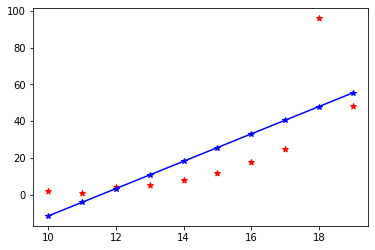

In [17]:
plt.scatter(x,y,color= "red",marker= "*")
plt.plot(x,y_predicted,color= "blue",marker= "*")
plt.show()

In [18]:
reg_res.stderr

2.257878767543913

### Also it is necessary to check if the DATA contains NaN values

In [19]:
(np.nan,type(np.nan))

(nan, float)

In [20]:
nan_value_in = [1,2,3,np.nan,100]
for val in nan_value_in:
    if val == np.nan:
        print("Found NaN")
# Strange

In [21]:
# Impossible to compare like this
np.nan == np.nan

False

In [22]:
# Such way of comparison is legitable
np.isnan(np.nan)

True

In [23]:
nan_value_in = [1,2,3,np.nan,100]
for val in nan_value_in:
    if np.isnan(val):
        print("Found NaN")

Found NaN


In [24]:
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

In [25]:
(x,y,z)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([ 2,  1,  4,  5,  8, 12, 18, 25, 96, 48]),
 array([  5,   3,   2,   1,   0,  -2,  -8, -11, -15, -16]))

### If necessary to compute correlation matrics of several vectors, use [list of vectors]

#### By default, numpy.corrcoef() considers the rows as features and the columns as observations. If you want the opposite behavior, which is widely used in machine learning, then use the argument rowvar=False:

In [26]:
xyz = np.array([x,y,z])

In [27]:
xyz

array([[ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [  2,   1,   4,   5,   8,  12,  18,  25,  96,  48],
       [  5,   3,   2,   1,   0,  -2,  -8, -11, -15, -16]])

In [28]:
# better view for Machine Learning stuff
xyz.T

array([[ 10,   2,   5],
       [ 11,   1,   3],
       [ 12,   4,   2],
       [ 13,   5,   1],
       [ 14,   8,   0],
       [ 15,  12,  -2],
       [ 16,  18,  -8],
       [ 17,  25, -11],
       [ 18,  96, -15],
       [ 19,  48, -16]])

#### If: rowvar = True (by default) 
#### Then: Row = feature, Column = observation
#### Else: (rowvar = False)
#### Then: Row = observation, Column = feature

In [29]:
np.corrcoef(xyz.T,rowvar= False)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

#### Going back into pandas module

In [39]:
(x,y,z)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([ 2,  1,  4,  5,  8, 12, 18, 25, 96, 48]),
 array([  5,   3,   2,   1,   0,  -2,  -8, -11, -15, -16]))

In [40]:
xyz = pd.DataFrame({
    "x": x,
    "y": y,
    "z": z
})

In [41]:
xyz.corr()

,x,y,z
x,1.000000,0.758640,-0.968072
y,0.758640,1.000000,-0.834079
z,-0.968072,-0.834079,1.000000


#### Useful method .corrwith()

In [50]:
xy = pd.DataFrame({
    "x": x,
    "y": y
})

In [51]:
xy

,x,y
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


In [52]:
z = pd.Series(z)

In [49]:
# Allows to find corrs between certain rows and columns in DataFrames and Series
xy.corrwith(z)

x   -0.968072
y   -0.834079
dtype: float64

## Spearman's ${\rho}$ and Kendall's ${\tau}$

The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values.

${\rho,\tau \in [-1,1]}$

Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.

In [59]:
scipy.stats.kendalltau(x,y)

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [60]:
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

## About data ranks

In [69]:
x = np.arange(10,20)
y = np.array([2, 2, 2, 2, 2, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

In [70]:
scipy.stats.rankdata(x)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [71]:
scipy.stats.rankdata(y)

array([ 3.,  3.,  3.,  3.,  3.,  6.,  7.,  8.,  9., 10., 12., 11.])

In [68]:
scipy.stats.rankdata(z)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [75]:
# NB it is possible to get list of INDICES of ascending elements via np.argsort()
np.argsort(x) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [76]:
np.argsort(y) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 11])

In [77]:
np.argsort(z) + 1

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])